In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

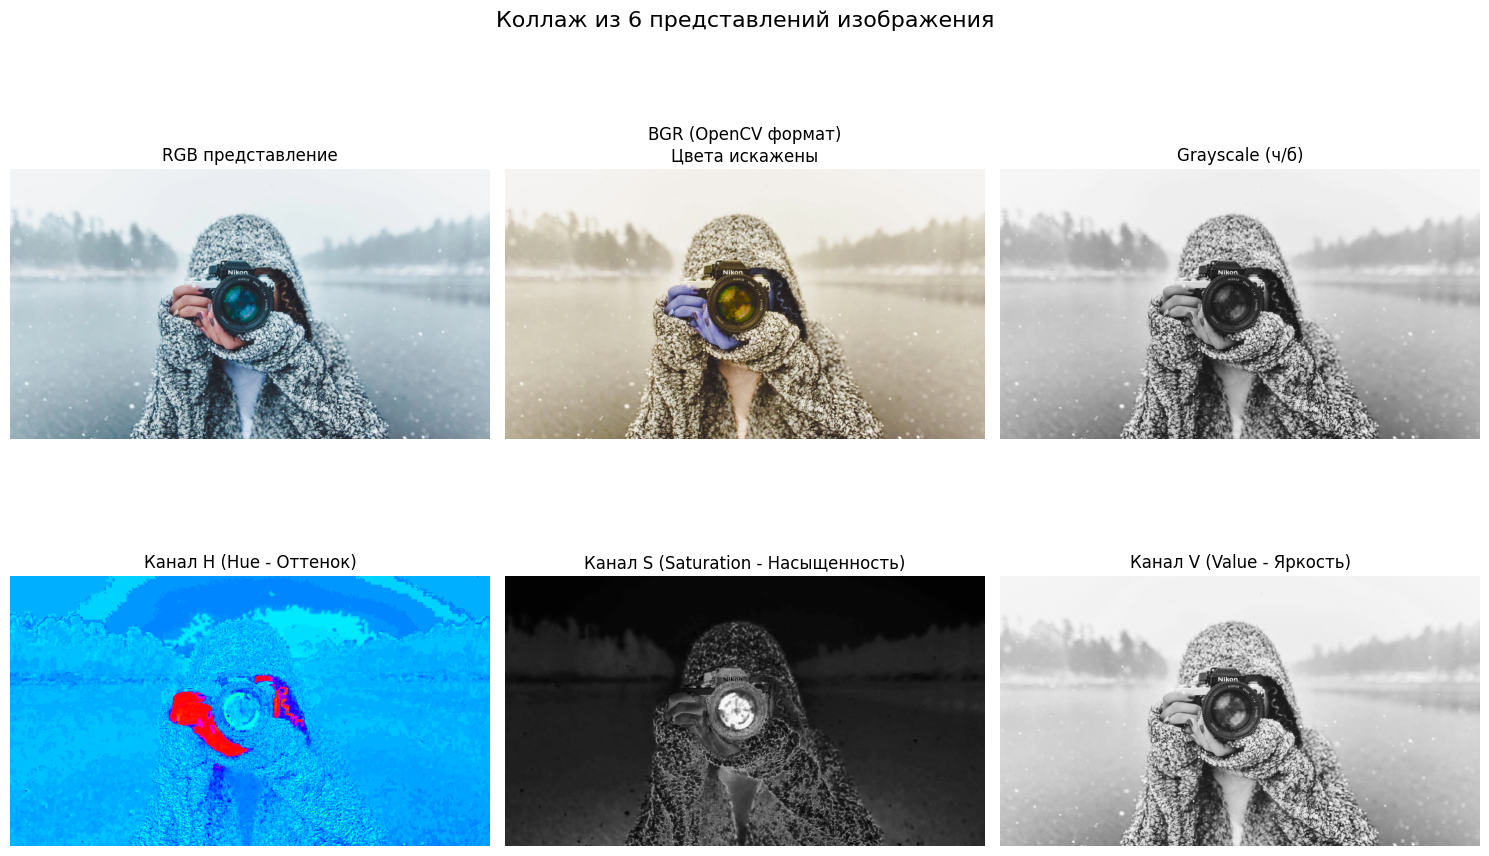

In [22]:
# ===============================
# ДОМАШНЕЕ ЗАДАНИЕ: Часть 1 - Коллаж из 6 представлений
# ===============================

# Загрузка изображения (если не загружено)
img_path = 'sample.jpg'
if os.path.exists(img_path):
    img = cv2.imread(img_path)
else:
    # Создаем тестовое изображение
    img = np.zeros((300, 400, 3), dtype=np.uint8)
    img[50:100, 50:150] = [255, 0, 0]
    img[50:100, 200:300] = [0, 255, 0]
    img[150:200, 50:150] = [0, 0, 255]
    img[150:200, 200:300] = [255, 255, 0]

# Подготовка всех представлений
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # RGB
img_bgr = img.copy()  # BGR (оригинал OpenCV)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Grayscale
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # HSV
h, s, v = cv2.split(img_hsv)  # Разделение HSV на каналы

# Создание коллажа
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# RGB
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title('RGB представление')
axes[0, 0].axis('off')

# BGR (неправильное отображение для демонстрации)
axes[0, 1].imshow(img_bgr)
axes[0, 1].set_title('BGR (OpenCV формат)\nЦвета искажены')
axes[0, 1].axis('off')

# Grayscale
axes[0, 2].imshow(img_gray, cmap='gray')
axes[0, 2].set_title('Grayscale (ч/б)')
axes[0, 2].axis('off')

# Канал Hue
axes[1, 0].imshow(h, cmap='hsv')
axes[1, 0].set_title('Канал H (Hue - Оттенок)')
axes[1, 0].axis('off')

# Канал Saturation
axes[1, 1].imshow(s, cmap='gray')
axes[1, 1].set_title('Канал S (Saturation - Насыщенность)')
axes[1, 1].axis('off')

# Канал Value
axes[1, 2].imshow(v, cmap='gray')
axes[1, 2].set_title('Канал V (Value - Яркость)')
axes[1, 2].axis('off')

plt.suptitle('Коллаж из 6 представлений изображения', fontsize=16)
plt.tight_layout()
plt.show()


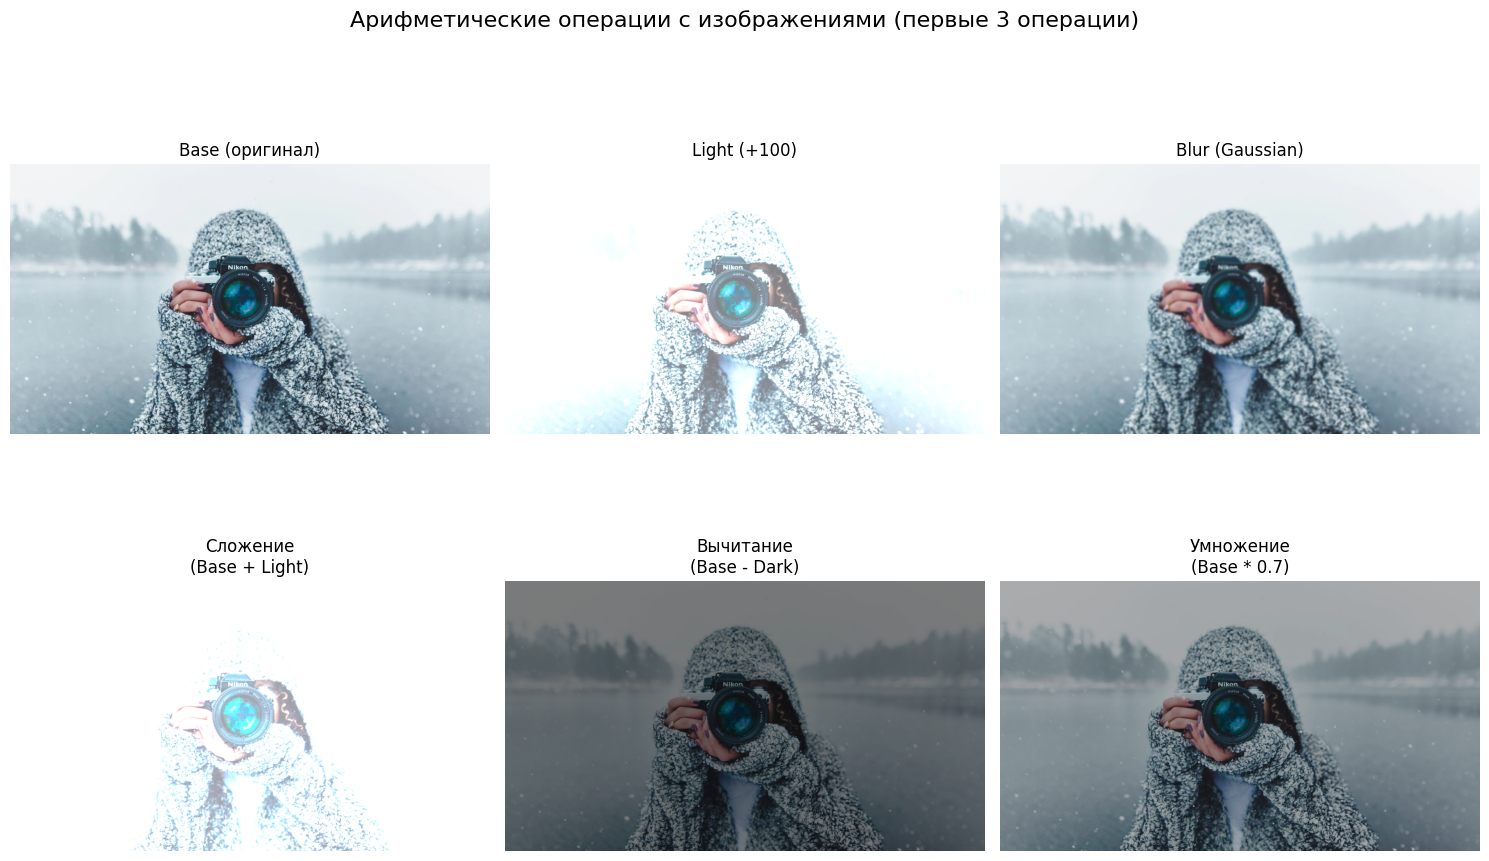

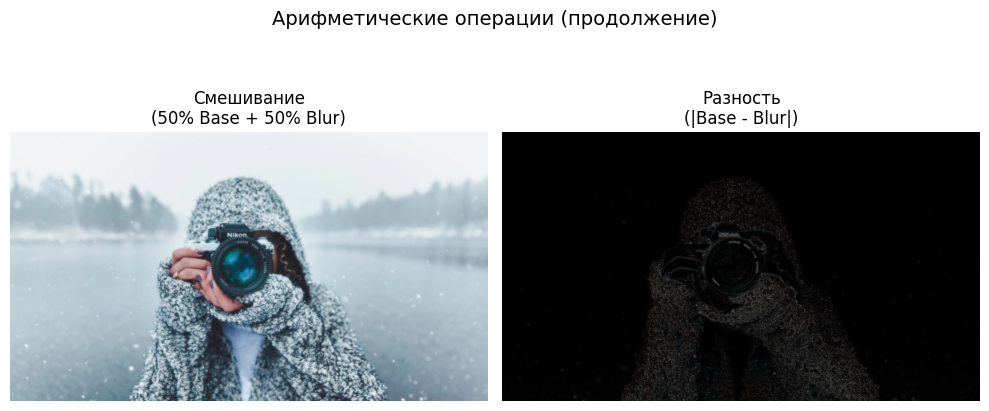

In [26]:
# ===============================
# ДОМАШНЕЕ ЗАДАНИЕ: Часть 2 - Арифметические операции
# ===============================

# Создаем несколько изображений для операций
img_base = img_rgb.copy()
img_blur = cv2.GaussianBlur(img_base, (25, 25), 0)  # Размытое
img_dark = (img_base * 0.5).astype(np.uint8)  # Темное
img_light = np.clip(img_base.astype(np.int16) + 100, 0, 255).astype(np.uint8)  # Светлое

# Различные арифметические операции
operations = {
    'Сложение\n(Base + Light)': cv2.add(img_base, img_light),
    'Вычитание\n(Base - Dark)': cv2.subtract(img_base, img_dark),
    'Умножение\n(Base * 0.7)': cv2.multiply(img_base, 0.7),
    'Смешивание\n(50% Base + 50% Blur)': cv2.addWeighted(img_base, 0.5, img_blur, 0.5, 0),
    'Разность\n(|Base - Blur|)': cv2.absdiff(img_base, img_blur)
}

# Визуализация - 2 строки по 3 столбца (всего 6 мест)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Исходные изображения (первые 3)
axes[0].imshow(img_base)
axes[0].set_title('Base (оригинал)')
axes[0].axis('off')

axes[1].imshow(img_light)
axes[1].set_title('Light (+100)')
axes[1].axis('off')

axes[2].imshow(img_blur)
axes[2].set_title('Blur (Gaussian)')
axes[2].axis('off')

# Результаты операций (следующие 3)
# Берем только первые 3 операции из словаря
for i, (name, result) in enumerate(list(operations.items())[:3], 3):
    axes[i].imshow(result)
    axes[i].set_title(name)
    axes[i].axis('off')

plt.suptitle('Арифметические операции с изображениями (первые 3 операции)', fontsize=16)
plt.tight_layout()
plt.show()

# Вторая часть операций
fig2, axes2 = plt.subplots(1, 2, figsize=(10, 5))
axes2 = axes2.flatten()

# Оставшиеся операции
remaining_ops = list(operations.items())[3:5]
for i, (name, result) in enumerate(remaining_ops):
    axes2[i].imshow(result)
    axes2[i].set_title(name)
    axes2[i].axis('off')

plt.suptitle('Арифметические операции (продолжение)', fontsize=14)
plt.tight_layout()
plt.show()

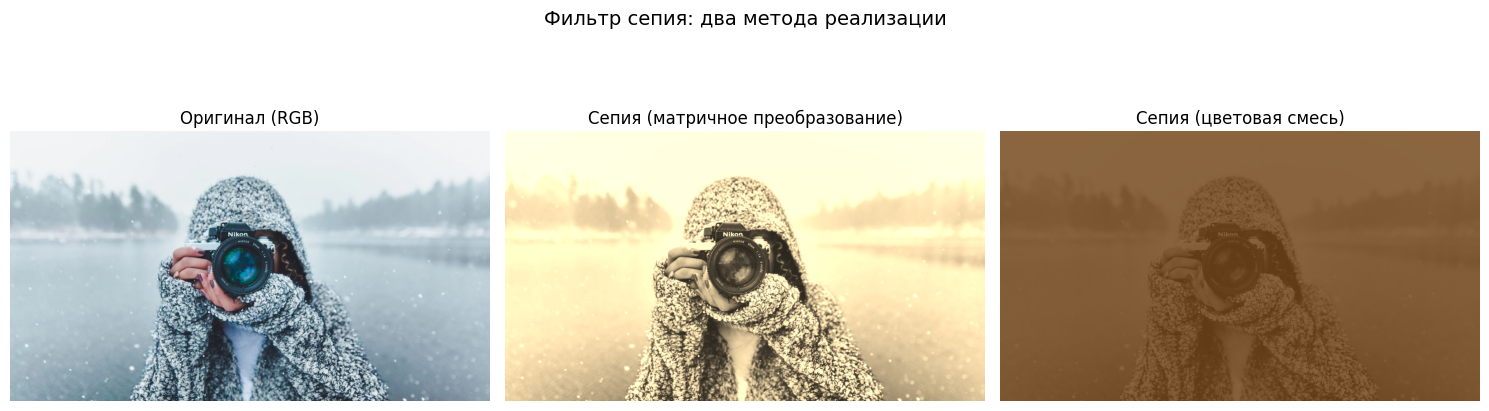

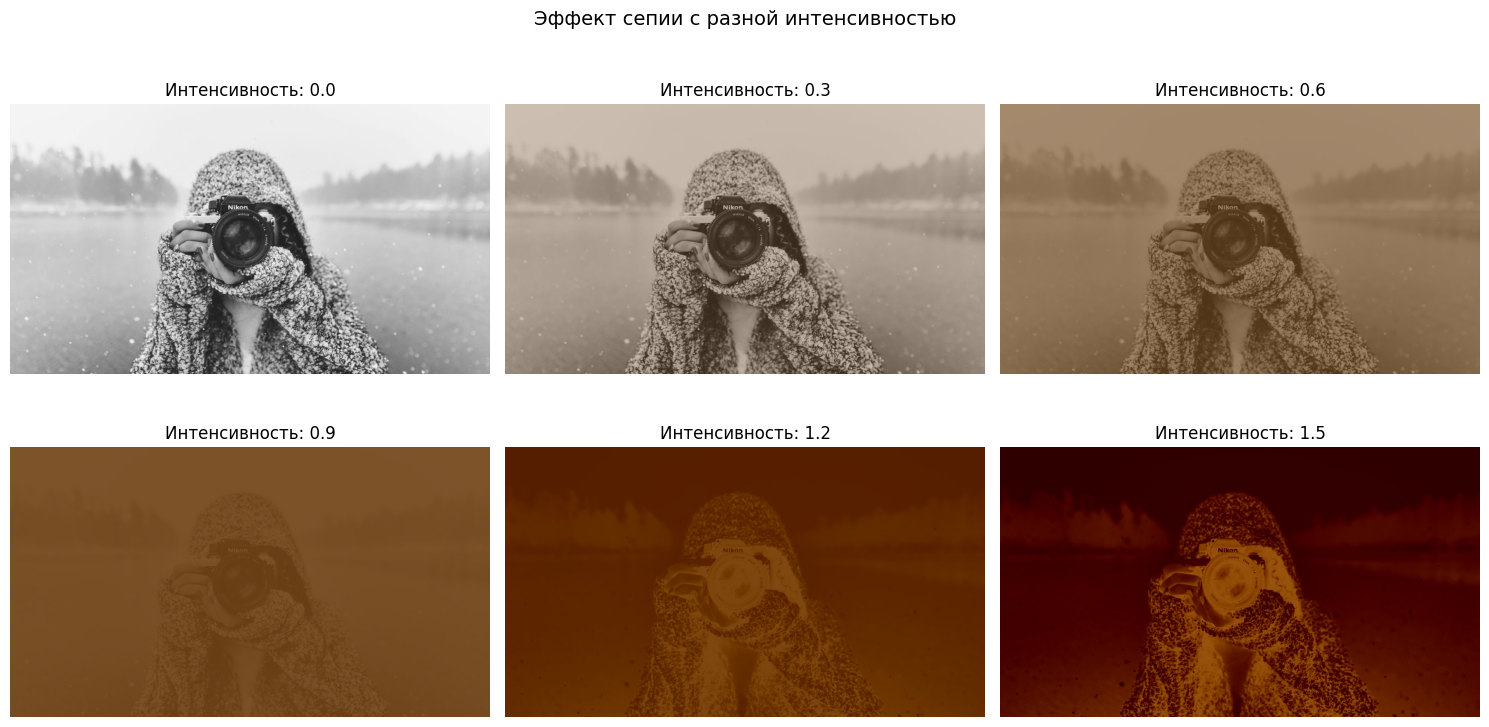

In [25]:
# ===============================
# ДОМАШНЕЕ ЗАДАНИЕ: Часть 3 - Фильтр сепия
# ===============================

def apply_sepia_filter(image):
    """
    Применяет фильтр сепии к изображению.

    Args:
        image: изображение в формате BGR (OpenCV)

    Returns:
        Изображение с эффектом сепии
    """
    # Матрица преобразования для сепии
    sepia_filter = np.array([[0.272, 0.534, 0.131],
                             [0.349, 0.686, 0.168],
                             [0.393, 0.769, 0.189]])

    # Применяем матрицу к каждому пикселю
    sepia_img = cv2.transform(image, sepia_filter)

    # Обрезаем значения до диапазона 0-255
    sepia_img = np.clip(sepia_img, 0, 255)

    return sepia_img.astype(np.uint8)

# Вариант 2: Сепия с разной интенсивностью
def apply_sepia_v2(image, intensity=1.0):
    """
    Применяет фильтр сепии с регулируемой интенсивностью.

    Args:
        image: изображение в формате BGR
        intensity: интенсивность эффекта (0.0 - 2.0)

    Returns:
        Изображение с эффектом сепии
    """
    # Базовые цвета сепии
    sepia_color = np.array([20, 66, 112])  # BGR: темно-коричневый

    # Конвертируем в grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    # Применяем сепию
    sepia_img = gray * (1 - intensity) + sepia_color * intensity
    sepia_img = np.clip(sepia_img, 0, 255)

    return sepia_img.astype(np.uint8)

# Применяем оба фильтра
img_sepia1 = apply_sepia_filter(img)
img_sepia2 = apply_sepia_v2(img, intensity=0.8)

# Конвертируем для отображения
img_sepia1_rgb = cv2.cvtColor(img_sepia1, cv2.COLOR_BGR2RGB)
img_sepia2_rgb = cv2.cvtColor(img_sepia2, cv2.COLOR_BGR2RGB)

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img_rgb)
axes[0].set_title('Оригинал (RGB)')
axes[0].axis('off')

axes[1].imshow(img_sepia1_rgb)
axes[1].set_title('Сепия (матричное преобразование)')
axes[1].axis('off')

axes[2].imshow(img_sepia2_rgb)
axes[2].set_title('Сепия (цветовая смесь)')
axes[2].axis('off')

plt.suptitle('Фильтр сепия: два метода реализации', fontsize=14)
plt.tight_layout()
plt.show()

# Демонстрация разной интенсивности
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
intensities = [0.0, 0.3, 0.6, 0.9, 1.2, 1.5]

for i, intensity in enumerate(intensities):
    row = i // 3
    col = i % 3
    sepia_img = apply_sepia_v2(img, intensity=intensity)
    sepia_img_rgb = cv2.cvtColor(sepia_img, cv2.COLOR_BGR2RGB)
    axes[row, col].imshow(sepia_img_rgb)
    axes[row, col].set_title(f'Интенсивность: {intensity}')
    axes[row, col].axis('off')

plt.suptitle('Эффект сепии с разной интенсивностью', fontsize=14)
plt.tight_layout()
plt.show()